<a href="https://colab.research.google.com/github/bahau88/hello-world/blob/main/Forward%20%26%20Inverse%20Kinematics%20Stanford%20Arm%20Manipulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
[]

[]

**DNRS- Home task (Kinematics) 1**

Student : Bahauddin Habibullah

Model   : Stanford Arm XZX

Report :



*   A simple graph of model 
*   Assignment of Coordinate frames on robot’s joints
*   Forward kinematics solution (only symbolic, the code is responsible for calculations)
*   Inverse kinematics solution
*   Results of code implementation 
*   Validation of inverse kinematics solution (inverse kinematics solution should correspond to 
forward kinematics solution

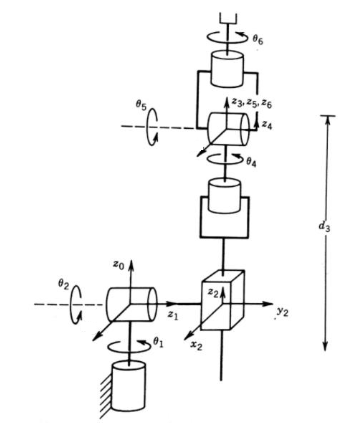

**Environtment setup**

In [ ]:
import sympy as sp

In [ ]:
from sympy.physics.vector import init_vprinting
init_vprinting(use_latex='mathjax', pretty_print=False)

In [ ]:
from tabulate import tabulate

In [ ]:
from sympy.physics.mechanics import dynamicsymbols

In [ ]:
theta1, theta2, theta3, theta4, theta5, theta6, l1, l2, l3, l4, l5, l6, theta, alpha, a, d = dynamicsymbols('theta1 theta2 theta3 theta4 theta5 theta6 l1 l2 l3 l4 l5 l6 theta alpha a d')
theta1, theta2, theta3, theta4, theta5, theta6, l1, l2, l3, l4, l5, l6, theta, alpha, a, d 

(theta1, theta2, theta3, theta4, theta5, theta6, l1, l2, l3, l4, l5, l6, theta, alpha, a, d)

**Kinematics (DH Method)**

In [ ]:
from sympy.physics.mechanics import dynamicsymbols

In [ ]:
table = [['Joint', 'Joint Angle', 'Link Offset', 'Link Length', 'Link Twist'], ['1', '\u03B81', 'd1', '0', -90 ], ['2', '\u03B82', 'd2', '0', -90 ], ['3', '-90', 'd3', '0', 0 ], ['4', '\u03B84', 'd4', '0', -90 ], ['5', '\u03B85', '0', '0', 90 ], ['6', '\u03B86', 'd6', '0', 0 ]]

In [ ]:
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════════╤═══════════════╤═══════════════╤═══════════════╤══════════════╕
│   Joint │ Joint Angle   │ Link Offset   │   Link Length │   Link Twist │
╞═════════╪═══════════════╪═══════════════╪═══════════════╪══════════════╡
│       1 │ θ1            │ d1            │             0 │          -90 │
├─────────┼───────────────┼───────────────┼───────────────┼──────────────┤
│       2 │ θ2            │ d2            │             0 │          -90 │
├─────────┼───────────────┼───────────────┼───────────────┼──────────────┤
│       3 │ -90           │ d3            │             0 │            0 │
├─────────┼───────────────┼───────────────┼───────────────┼──────────────┤
│       4 │ θ4            │ d4            │             0 │          -90 │
├─────────┼───────────────┼───────────────┼───────────────┼──────────────┤
│       5 │ θ5            │ 0             │             0 │           90 │
├─────────┼───────────────┼───────────────┼───────────────┼──────────────┤
│       6 │ θ6           

In [ ]:
table = [['Parameter', 'Lower Boundary', 'Upper Boundary'], ['\u03B81', '-180', '180'], ['\u03B82', '-90', '90'], ['d3', '1', '3'], ['\u03B84', '-180', '180'], ['\u03B85', '-25', '25'], ['\u03B86', '-180', '180']]

In [ ]:
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════════════╤══════════════════╤══════════════════╕
│ Parameter   │   Lower Boundary │   Upper Boundary │
╞═════════════╪══════════════════╪══════════════════╡
│ θ1          │             -180 │              180 │
├─────────────┼──────────────────┼──────────────────┤
│ θ2          │              -90 │               90 │
├─────────────┼──────────────────┼──────────────────┤
│ d3          │                1 │                3 │
├─────────────┼──────────────────┼──────────────────┤
│ θ4          │             -180 │              180 │
├─────────────┼──────────────────┼──────────────────┤
│ θ5          │              -25 │               25 │
├─────────────┼──────────────────┼──────────────────┤
│ θ6          │             -180 │              180 │
╘═════════════╧══════════════════╧══════════════════╛


**Homogeus Transformation**

Transformation Matrix

In [ ]:
rot = sp.Matrix([[sp.cos(theta), -sp.sin(theta)*sp.cos(alpha), sp.sin(theta)*sp.sin(alpha)],
                 [sp.sin(theta), sp.cos(theta)*sp.cos(alpha), -sp.cos(theta)*sp.sin(alpha)],
                 [0, sp.sin(alpha), sp.cos(alpha)]])

trans = sp.Matrix([a*sp.cos(theta),a*sp.sin(theta),d])

last_row = sp.Matrix([[0, 0, 0, 1]])

m = sp.Matrix.vstack(sp.Matrix.hstack(rot, trans), last_row)
m

Matrix([
[cos(theta), -sin(theta)*cos(alpha),  sin(alpha)*sin(theta), a*cos(theta)],
[sin(theta),  cos(alpha)*cos(theta), -sin(alpha)*cos(theta), a*sin(theta)],
[         0,             sin(alpha),             cos(alpha),            d],
[         0,                      0,                      0,            1]])

From 0 to 1

In [ ]:
m01 = m.subs({alpha:0, a:l1, theta:theta1, d:0})
m01

Matrix([
[cos(theta1), -sin(theta1), 0, l1*cos(theta1)],
[sin(theta1),  cos(theta1), 0, l1*sin(theta1)],
[          0,            0, 1,              0],
[          0,            0, 0,              1]])

From 1 to 2

In [ ]:
m12 = m.subs({alpha:0, a:l2, theta:theta2, d:0})
m12

Matrix([
[cos(theta2), -sin(theta2), 0, l2*cos(theta2)],
[sin(theta2),  cos(theta2), 0, l2*sin(theta2)],
[          0,            0, 1,              0],
[          0,            0, 0,              1]])

From 2 to 3

In [ ]:
m23 = m.subs({alpha:0, a:l3, theta:theta3, d:0})
m23

Matrix([
[cos(theta3), -sin(theta3), 0, l3*cos(theta3)],
[sin(theta3),  cos(theta3), 0, l3*sin(theta3)],
[          0,            0, 1,              0],
[          0,            0, 0,              1]])

From 3 to 4

In [ ]:
m34 = m.subs({alpha:0, a:l4, theta:theta4, d:0})
m34

Matrix([
[cos(theta4), -sin(theta4), 0, l4*cos(theta4)],
[sin(theta4),  cos(theta4), 0, l4*sin(theta4)],
[          0,            0, 1,              0],
[          0,            0, 0,              1]])

From 4 to 5

In [ ]:
m45 = m.subs({alpha:0, a:l5, theta:theta5, d:0})
m45

Matrix([
[cos(theta5), -sin(theta5), 0, l5*cos(theta5)],
[sin(theta5),  cos(theta5), 0, l5*sin(theta5)],
[          0,            0, 1,              0],
[          0,            0, 0,              1]])

From 5 to 6

In [ ]:
m56 = m.subs({alpha:0, a:l6, theta:theta6, d:0})
m56

Matrix([
[cos(theta6), -sin(theta6), 0, l6*cos(theta6)],
[sin(theta6),  cos(theta6), 0, l6*sin(theta6)],
[          0,            0, 1,              0],
[          0,            0, 0,              1]])

Homogeus Tranformation from 3 to 6

In [ ]:
m36 = (m34*m45*m56)
m36

Matrix([
[(-sin(theta4)*sin(theta5) + cos(theta4)*cos(theta5))*cos(theta6) + (-sin(theta4)*cos(theta5) - sin(theta5)*cos(theta4))*sin(theta6), -(-sin(theta4)*sin(theta5) + cos(theta4)*cos(theta5))*sin(theta6) + (-sin(theta4)*cos(theta5) - sin(theta5)*cos(theta4))*cos(theta6), 0, (-sin(theta4)*sin(theta5) + cos(theta4)*cos(theta5))*l6*cos(theta6) + (-sin(theta4)*cos(theta5) - sin(theta5)*cos(theta4))*l6*sin(theta6) + l4*cos(theta4) - l5*sin(theta4)*sin(theta5) + l5*cos(theta4)*cos(theta5)],
[ (-sin(theta4)*sin(theta5) + cos(theta4)*cos(theta5))*sin(theta6) + (sin(theta4)*cos(theta5) + sin(theta5)*cos(theta4))*cos(theta6),   (-sin(theta4)*sin(theta5) + cos(theta4)*cos(theta5))*cos(theta6) - (sin(theta4)*cos(theta5) + sin(theta5)*cos(theta4))*sin(theta6), 0,  (-sin(theta4)*sin(theta5) + cos(theta4)*cos(theta5))*l6*sin(theta6) + (sin(theta4)*cos(theta5) + sin(theta5)*cos(theta4))*l6*cos(theta6) + l4*sin(theta4) + l5*sin(theta4)*cos(theta5) + l5*sin(theta5)*cos(theta4)],
[                  

Simplify

In [ ]:
mbee= sp.Matrix([[m36[0,0].simplify(), m36[0,1].simplify(), sp.trigsimp(m36[0,3].simplify())],
                 [m36[1,0].simplify(), m36[1,1].simplify(), sp.trigsimp(m36[1,3].simplify())],
                 [m36[2,0].simplify(), m36[2,1].simplify(), m36[2,2].simplify()]])

mbee

Matrix([
[cos(theta4 + theta5 + theta6), -sin(theta4 + theta5 + theta6), l4*cos(theta4) + l5*cos(theta4 + theta5) + l6*cos(theta4 + theta5 + theta6)],
[sin(theta4 + theta5 + theta6),  cos(theta4 + theta5 + theta6), l4*sin(theta4) + l5*sin(theta4 + theta5) + l6*sin(theta4 + theta5 + theta6)],
[                            0,                              0,                                                                           1]])

**Forward Kinematics**

Position of the end effector in 2D

X direction

In [ ]:
px = mbee[0,2]
px

l4*cos(theta4) + l5*cos(theta4 + theta5) + l6*cos(theta4 + theta5 + theta6)

Y direction

In [ ]:
py = mbee[1,2]
py

l4*sin(theta4) + l5*sin(theta4 + theta5) + l6*sin(theta4 + theta5 + theta6)

Position of the end effector in 3D

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import math

# 3D projection
from mpl_toolkits.mplot3d import Axes3D

l_1 = 0.5 # length of link 1 [m]
l_2 = 0.5 # length of link 2 [m]

L = [l_1, l_2] # Link parameter
th = [0.0*math.pi, 0.0*math.pi, 0.0*math.pi] # initial angles

def ForwardKinematics(th, L):

  L1, L2 = L
  Th1, Th2, Th3 = th
	
  x0 = 0.0
  y0 = 0.0
  z0 = 0.0

  ######################
  # position of tip of link 1
  x1 = L1*math.cos(Th2)*math.cos(Th1)
  y1 = L1*math.cos(Th2)*math.sin(Th1)
  z1 = L1*math.sin(Th2)

  #Position of tip of link 2
  x2 = x1 + L2*math.cos(Th2+Th3)*math.cos(th1)
  y2 = y1 + L2*math.cos(Th2+Th2)*math.sin(th1)
  z2 = z1 + L2*math.sin(Th2+Th3)

  #####################################
  X = np.array([[x0, y0, z0], [x1, y1, z1], [x2, y2, z2]])
  return X

Evaluation of Tip Position

In [ ]:
fx = sp.lambdify((l4, l5, l6, theta4, theta5, theta6), px, 'numpy')
fy = sp.lambdify((l4, l5, l6, theta4, theta5, theta6), py, 'numpy')


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
d2r = np.deg2rad

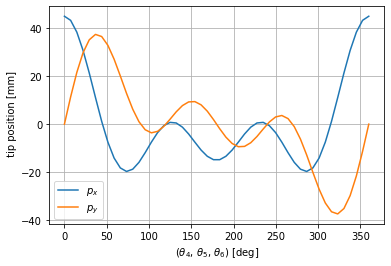

In [ ]:
theta4s = np.linspace(d2r(0), d2r(360)) # desired range of motion for joint 4
theta5s = np.linspace(d2r(0), d2r(360)) # desired range of motion for joint 5
theta6s = np.linspace(d2r(0), d2r(360)) # desired range of motion for joint 6

zx = np.array(fx(15.0, 15.0, 15.0, theta4s, theta5s, theta6s))
zy = np.array(fy(15.0, 15.0, 15.0, theta4s, theta5s, theta6s))

fig, ax1 = plt.subplots()
ax1.plot(np.rad2deg(theta4s), zx, label = r'$p_x$')
ax1.plot(np.rad2deg(theta6s), zy, label = r'$p_y$')
ax1.set_xlabel(r'($\theta_4$, $\theta_5$, $\theta_6$) [deg]')
ax1.set_ylabel(r' tip position [mm]')
plt.legend()
plt.grid()

**Inverse Kinematics**

In [ ]:
pip install pyswarms

In [ ]:
# Import modules
import numpy as np

# Import PySwarms
import pyswarms as ps

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Parameter Vector X

In [ ]:
theta1, theta2, theta3, theta4, theta5, theta6, = dynamicsymbols('theta1 theta2 theta3 theta4 theta5 theta6')
theta1, theta2, theta3, theta4, theta5, theta6, 

(theta1, theta2, theta3, theta4, theta5, theta6)

Target Vector T

In [ ]:
Tx, Ty, Tz, = dynamicsymbols('Tx, Ty, Tz,')
Tx, Ty, Tz, 

(Tx, Ty, Tz)

target : -2, 2, 4

In [ ]:
def distance(query, target):
    x_dist = (target[0] - query[0])**2
    y_dist = (target[1] - query[1])**2
    z_dist = (target[2] - query[2])**2
    dist = np.sqrt(x_dist + y_dist + z_dist)
    return dist

define the joint lengths to be 3 units long

In [ ]:
swarm_size = 20
dim = 6        # Dimension of X
epsilon = 1.0
options = {'c1': 1.5, 'c2':1.5, 'w':0.5}

constraints = (np.array([-np.pi , -np.pi/2 , 1 , -np.pi , -5*np.pi/36 , -np.pi]),
               np.array([np.pi  ,  np.pi/2 , 3 ,  np.pi ,  5*np.pi/36 ,  np.pi]))

d1 = d2 = d3 = d4 = d5 = d6 = 3

The function uses the rotation angle and the extension d of a prismatic joint as input:

In [ ]:
def getTransformMatrix(theta, d, a, alpha):
    T = np.array([[np.cos(theta) , -np.sin(theta)*np.cos(alpha) ,  np.sin(theta)*np.sin(alpha) , a*np.cos(theta)],
                  [np.sin(theta) ,  np.cos(theta)*np.cos(alpha) , -np.cos(theta)*np.sin(alpha) , a*np.sin(theta)],
                  [0             ,  np.sin(alpha)               ,  np.cos(alpha)               , d              ],
                  [0             ,  0                           ,  0                           , 1              ]
                 ])
    return T

create another function that takes our vector X with the joint variables as input:

In [ ]:
def get_end_tip_position(params):
    # Create the transformation matrices for the respective joints
    t_00 = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
    t_01 = getTransformMatrix(params[0] , d2        , 0 , -np.pi/2)
    t_12 = getTransformMatrix(params[1] , d2        , 0 , -np.pi/2)
    t_23 = getTransformMatrix(0         , params[2] , 0 , -np.pi/2)
    t_34 = getTransformMatrix(params[3] , d4        , 0 , -np.pi/2)
    t_45 = getTransformMatrix(params[4] , 0         , 0 ,  np.pi/2)
    t_56 = getTransformMatrix(params[5] , d6        ,0  ,  0)

    # Get the overall transformation matrix
    end_tip_m = t_00.dot(t_01).dot(t_12).dot(t_23).dot(t_34).dot(t_45).dot(t_56)

    # The coordinates of the end tip are the 3 upper entries in the 4th column
    pos = np.array([end_tip_m[0,3],end_tip_m[1,3],end_tip_m[2,3]])
    return pos

calculate the distance between the position of each swarm particle and the target point:

In [ ]:
def opt_func(X):
    n_particles = X.shape[0]  # number of particles
    target = np.array([-2,2,4])
    dist = [distance(get_end_tip_position(X[i]), target) for i in range(n_particles)]
    return np.array(dist)

Start the algorithm

In [ ]:
%%time
# Call an instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=swarm_size,
                                    dimensions=dim,
                                    options=options,
                                    bounds=constraints)

# Perform optimization
cost, joint_vars = optimizer.optimize(opt_func, iters=1000)

2021-09-04 17:12:03,499 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.0947
2021-09-04 17:12:12,492 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.09466748928356819, best pos: [-2.04288297  1.53836473  1.38550304  2.6737848   0.38774415  0.99623104]


CPU times: user 8.23 s, sys: 533 ms, total: 8.77 s
Wall time: 9 s


In [ ]:

print(get_end_tip_position(joint_vars))

[-2.0613439   2.07020372  3.98355928]
